# Exploratory Data Analysis

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv( "../datasets/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.drop(columns = ["Name", "Ticket"], inplace = True)

In [4]:
#Pclass : Makes sense to have ordered categories as 3 is indeed closer to 2 than 1
#Name : Can be dropped for initial model
#Sex : Convert to 0-1 classes
#Age : Numerical (Can use buckets)
#SibSp, Parch : Have to check scatter plot for correlation with survival rate
#Ticket : Drop
#Fare : Numerical (Can use buckets)
#Cabin : From the looks of it, not capturing any extra info above the pclass feature
#Embarked : Can one-hot encoders for each class

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
def count_freq_class_survived(df, cat, tar):
    counts = pd.crosstab(df[cat], df[tar])
    return counts

In [7]:
count_freq_class_survived(train_data, "Pclass", "Survived")

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [8]:
count_freq_class_survived(train_data, "Sex", "Survived")

Survived,0,1
Sex,,
female,81,233
male,468,109


In [9]:
count_freq_class_survived(train_data, "Embarked", "Survived")

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


array([[<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

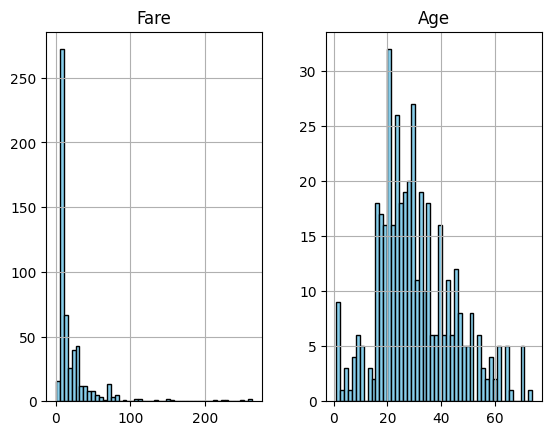

In [10]:
train_data[train_data["Survived"]==0].loc[:,["Fare","Age"]].hist(bins=50, edgecolor='black', color='skyblue')

array([[<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

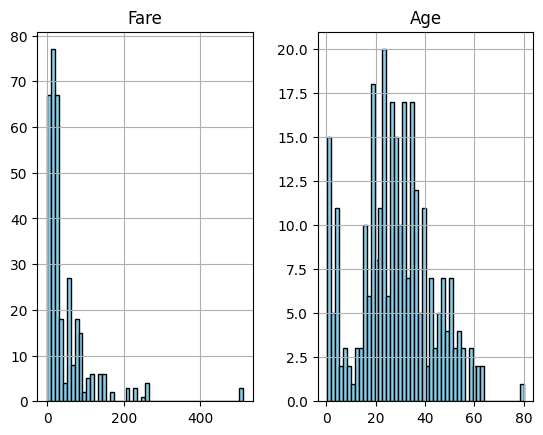

In [11]:
train_data[train_data["Survived"]==1].loc[:,["Fare","Age"]].hist(bins=50, edgecolor='black', color='skyblue')

In [12]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#Impute age by average
#Cabin becomes binary and that takes care of Nan
#Drop the two embarked Nan entries

# Data Splitting

In [19]:
data = pd.read_csv( "../datasets/train.csv")
features = data.drop(["Survived"], axis=1)
targets = data.loc[:,["Survived"]]

In [20]:
X_train, X_val, y_train, y_val = train_test_split( features, targets, test_size=100, random_state=42, stratify=targets )

In [21]:
X_train.shape, y_train.shape

((791, 11), (791, 1))

In [22]:
train_data = pd.concat( [X_train, y_train], axis=1)
train_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
103,104,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S,0
349,350,3,"Dimic, Mr. Jovan",male,42.0,0,0,315088,8.6625,NaN,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
345,346,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S,1
652,653,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,1
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S,0
462,463,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S,0
513,514,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C,1


In [23]:
train_data.to_pickle("train.pkl")

In [24]:
val_data = pd.concat([X_val,y_val],axis=1)
val_data.to_pickle("val.pkl")